# Hopfield-Netze

In [1]:
import numpy as np

class HopfieldNetwork:
    def __init__(self, num_neurons):
        self.num_neurons = num_neurons
        self.weights = np.zeros((num_neurons, num_neurons))

    def train(self, patterns):
        for pattern in patterns:
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)
        self.weights /= len(patterns)

    def recall(self, pattern, steps=5):
        for _ in range(steps):
            pattern = np.sign(self.weights @ pattern)
        return pattern

def create_patterns():
    patterns = np.array([
        [1, -1, 1, -1, 1, -1, 1, -1],
        [-1, 1, -1, 1, -1, 1, -1, 1],
        [1, 1, -1, -1, 1, 1, -1, -1]
    ])
    return patterns

def add_noise(pattern, noise_level=0.1):
    noisy_pattern = pattern.copy()
    num_noisy_bits = int(noise_level * len(pattern))
    flip_indices = np.random.choice(len(pattern), num_noisy_bits, replace=False)
    noisy_pattern[flip_indices] *= -1
    return noisy_pattern

if __name__ == "__main__":
    patterns = create_patterns()
    hopfield_net = HopfieldNetwork(num_neurons=patterns.shape[1])
    hopfield_net.train(patterns)

    for i, pattern in enumerate(patterns):
        noisy_pattern = add_noise(pattern, noise_level=0.3)
        recalled_pattern = hopfield_net.recall(noisy_pattern)
        print(f"Original Pattern {i+1}: {pattern}")
        print(f"Noisy Pattern {i+1}: {noisy_pattern}")
        print(f"Recalled Pattern {i+1}: {recalled_pattern}")
        print()

Original Pattern 1: [ 1 -1  1 -1  1 -1  1 -1]
Noisy Pattern 1: [-1 -1  1 -1  1  1  1 -1]
Recalled Pattern 1: [ 1. -1.  1. -1.  1. -1.  1. -1.]

Original Pattern 2: [-1  1 -1  1 -1  1 -1  1]
Noisy Pattern 2: [ 1  1  1  1 -1  1 -1  1]
Recalled Pattern 2: [-1.  1. -1.  1. -1.  1. -1.  1.]

Original Pattern 3: [ 1  1 -1 -1  1  1 -1 -1]
Noisy Pattern 3: [ 1 -1 -1 -1  1  1  1 -1]
Recalled Pattern 3: [ 1. -1.  1. -1.  1. -1.  1. -1.]



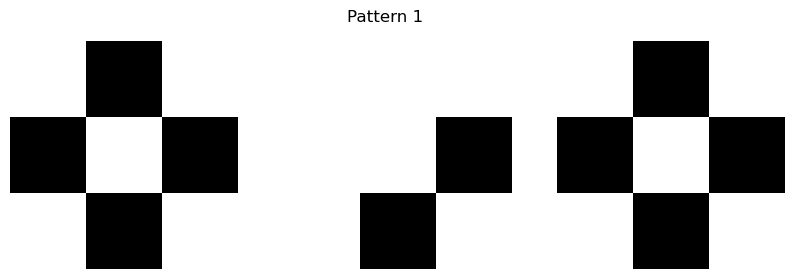

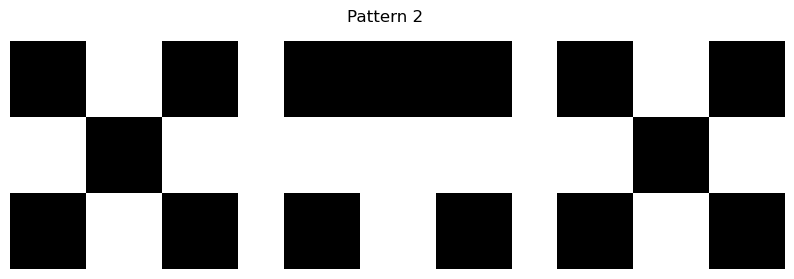

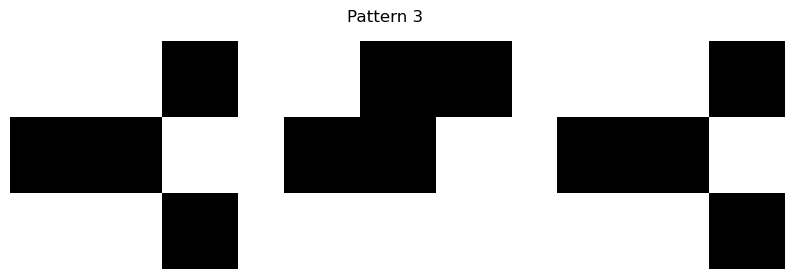

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class HopfieldNetwork2D:
    def __init__(self, shape):
        self.shape = shape
        self.num_neurons = shape[0] * shape[1]
        self.weights = np.zeros((self.num_neurons, self.num_neurons))

    def train(self, patterns):
        for pattern in patterns:
            flat_pattern = pattern.flatten()
            self.weights += np.outer(flat_pattern, flat_pattern)
        np.fill_diagonal(self.weights, 0)
        self.weights /= len(patterns)

    def recall(self, pattern, steps=5):
        flat_pattern = pattern.flatten()
        for _ in range(steps):
            flat_pattern = np.sign(self.weights @ flat_pattern)
        return flat_pattern.reshape(self.shape)

def create_patterns():
    patterns = [
        np.array([[1, -1, 1], [-1, 1, -1], [1, -1, 1]]),
        np.array([[-1, 1, -1], [1, -1, 1], [-1, 1, -1]]),
        np.array([[1, 1, -1], [-1, -1, 1], [1, 1, -1]])
    ]
    return patterns

def add_noise(pattern, noise_level=0.1):
    noisy_pattern = pattern.copy()
    num_noisy_bits = int(noise_level * pattern.size)
    flip_indices = np.random.choice(pattern.size, num_noisy_bits, replace=False)
    noisy_pattern.flat[flip_indices] *= -1
    return noisy_pattern

def plot_patterns(patterns, title):
    fig, axes = plt.subplots(1, len(patterns), figsize=(10, 3))
    for ax, pattern in zip(axes, patterns):
        ax.imshow(pattern, cmap='gray')
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

if __name__ == "__main__":
    patterns = create_patterns()
    hopfield_net = HopfieldNetwork2D(shape=patterns[0].shape)
    hopfield_net.train(patterns)

    for i, pattern in enumerate(patterns):
        noisy_pattern = add_noise(pattern, noise_level=0.3)
        recalled_pattern = hopfield_net.recall(noisy_pattern)
        plot_patterns([pattern, noisy_pattern, recalled_pattern], f"Pattern {i+1}")